# Renewable Energy Prediction
Data from: https://data.open-power-system-data.org/

In [1123]:
#Importing libraries for visualization, graphs, and modeling
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set()
from pylab import *
from scipy import special, optimize
import sys
import os
pd.set_option('display.max_columns', None)
from fbprophet import Prophet

In [1124]:
filepath_prod = "/Users/robertprior/Desktop/ML Projects/Final Project/time_series_60min_singleindex.csv"
#filepath_w = "/⁨Users⁩/⁨robertprior⁩/Desktop⁩/⁨ML Projects⁩/Final Project⁩/weather_data.csv"
filepath_w = "/Users/robertprior/Desktop/ML Projects/Final Project/weather_data.csv"


In [1125]:
prod = pd.read_csv(filepath_prod,
                        usecols=(lambda s: s.startswith('utc') | s.startswith('DE')),
                        parse_dates=[0], index_col=0)

In [1126]:
weather = pd.read_csv(filepath_w, parse_dates=[0], index_col=0)

Electricity production first

In [1129]:
prod.head()

,DE_load_entsoe_power_statistics,DE_load_entsoe_transparency,DE_price_day_ahead,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile,DE_50hertz_solar_generation_actual,DE_50hertz_solar_generation_forecast,DE_50hertz_wind_generation_actual,DE_50hertz_wind_generation_forecast,DE_50hertz_wind_offshore_generation_actual,DE_50hertz_wind_offshore_generation_forecast,DE_50hertz_wind_onshore_generation_actual,DE_50hertz_wind_onshore_generation_forecast,DE_AT_LU_price_day_ahead,DE_amprion_solar_generation_actual,DE_amprion_solar_generation_forecast,DE_amprion_wind_generation_actual,DE_amprion_wind_generation_forecast,DE_amprion_wind_onshore_generation_actual,DE_tennet_solar_generation_actual,DE_tennet_solar_generation_forecast,DE_tennet_wind_generation_actual,DE_tennet_wind_generation_forecast,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_solar_generation_actual,DE_transnetbw_solar_generation_forecast,DE_transnetbw_wind_generation_actual,DE_transnetbw_wind_generation_forecast,DE_transnetbw_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-12-31 23:00:00+00:00,47823.0,NaN,32.10,2028.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16394.0,NaN,NaN,NaN,NaN,2119.0,1366.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1707.0,1864.0,0.0,1707.0,NaN,NaN,NaN,NaN,NaN
2006-01-01 00:00:00+00:00,47823.0,NaN,30.07,2028.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16394.0,NaN,NaN,NaN,NaN,2226.0,1306.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1755.0,1813.0,0.0,1755.0,NaN,NaN,NaN,NaN,NaN
2006-01-01 01:00:00+00:00,43444.0,NaN,27.94,2028.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16394.0,NaN,NaN,NaN,NaN,2062.0,1245.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1591.0,1726.0,0.0,1591.0,NaN,NaN,NaN,NaN,NaN
2006-01-01 02:00:00+00:00,41432.0,NaN,21.71,2028.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16394.0,NaN,NaN,NaN,NaN,2041.0,1196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1628.0,1627.0,0.0,1628.0,NaN,NaN,NaN,NaN,NaN
2006-01-01 03:00:00+00:00,40508.0,NaN,8.24,2028.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16394.0,NaN,NaN,NaN,NaN,1868.0,1058.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1452.0,1570.0,0.0,1452.0,NaN,NaN,NaN,NaN,NaN


In [1128]:
prod_missing = prod.isnull().columns
#prod_missing = prod_missing.drop(['DE_wind_generation_actual','DE_solar_generation_actual'])
print(prod_missing)

Index(['DE_load_entsoe_power_statistics', 'DE_load_entsoe_transparency',
       'DE_price_day_ahead', 'DE_solar_capacity', 'DE_solar_generation_actual',
       'DE_solar_profile', 'DE_wind_capacity', 'DE_wind_generation_actual',
       'DE_wind_profile', 'DE_wind_offshore_capacity',
       'DE_wind_offshore_generation_actual', 'DE_wind_offshore_profile',
       'DE_wind_onshore_capacity', 'DE_wind_onshore_generation_actual',
       'DE_wind_onshore_profile', 'DE_50hertz_solar_generation_actual',
       'DE_50hertz_solar_generation_forecast',
       'DE_50hertz_wind_generation_actual',
       'DE_50hertz_wind_generation_forecast',
       'DE_50hertz_wind_offshore_generation_actual',
       'DE_50hertz_wind_offshore_generation_forecast',
       'DE_50hertz_wind_onshore_generation_actual',
       'DE_50hertz_wind_onshore_generation_forecast',
       'DE_AT_LU_price_day_ahead', 'DE_amprion_solar_generation_actual',
       'DE_amprion_solar_generation_forecast',
       'DE_amprion_wind_gene

In [802]:
prod.isnull().sum()

DE_load_entsoe_power_statistics                  1466
DE_load_entsoe_transparency                     78145
DE_price_day_ahead                                  0
DE_solar_capacity                                3624
DE_solar_generation_actual                      54743
DE_solar_profile                                56254
DE_wind_capacity                                35087
DE_wind_generation_actual                       37185
DE_wind_profile                                 38696
DE_wind_offshore_capacity                       35087
DE_wind_offshore_generation_actual              87650
DE_wind_offshore_profile                        91272
DE_wind_onshore_capacity                         3624
DE_wind_onshore_generation_actual               89761
DE_wind_onshore_profile                         91272
DE_50hertz_solar_generation_actual              52584
DE_50hertz_solar_generation_forecast            52584
DE_50hertz_wind_generation_actual                   4
DE_50hertz_wind_generation_f

In [803]:
#prod = prod[pd.notnull(prod['DE_solar_generation_actual'])]

In [804]:
prod[prod_missing] = prod[prod_missing].apply(lambda x: x.fillna(x.mean()), axis=1)

In [805]:
prod.isnull().sum()

DE_load_entsoe_power_statistics                     0
DE_load_entsoe_transparency                         0
DE_price_day_ahead                                  0
DE_solar_capacity                                   0
DE_solar_generation_actual                      54743
DE_solar_profile                                    0
DE_wind_capacity                                    0
DE_wind_generation_actual                       37185
DE_wind_profile                                     0
DE_wind_offshore_capacity                           0
DE_wind_offshore_generation_actual                  0
DE_wind_offshore_profile                            0
DE_wind_onshore_capacity                            0
DE_wind_onshore_generation_actual                   0
DE_wind_onshore_profile                             0
DE_50hertz_solar_generation_actual                  0
DE_50hertz_solar_generation_forecast                0
DE_50hertz_wind_generation_actual                   0
DE_50hertz_wind_generation_f

In [806]:
prod = prod.dropna()

In [807]:
prod.isnull().sum()

DE_load_entsoe_power_statistics                 0
DE_load_entsoe_transparency                     0
DE_price_day_ahead                              0
DE_solar_capacity                               0
DE_solar_generation_actual                      0
DE_solar_profile                                0
DE_wind_capacity                                0
DE_wind_generation_actual                       0
DE_wind_profile                                 0
DE_wind_offshore_capacity                       0
DE_wind_offshore_generation_actual              0
DE_wind_offshore_profile                        0
DE_wind_onshore_capacity                        0
DE_wind_onshore_generation_actual               0
DE_wind_onshore_profile                         0
DE_50hertz_solar_generation_actual              0
DE_50hertz_solar_generation_forecast            0
DE_50hertz_wind_generation_actual               0
DE_50hertz_wind_generation_forecast             0
DE_50hertz_wind_offshore_generation_actual      0


In [808]:
target_wind = prod['DE_wind_generation_actual']
target_solar = prod['DE_solar_generation_actual']

In [809]:
prod.head()

,DE_load_entsoe_power_statistics,DE_load_entsoe_transparency,DE_price_day_ahead,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile,DE_50hertz_solar_generation_actual,DE_50hertz_solar_generation_forecast,DE_50hertz_wind_generation_actual,DE_50hertz_wind_generation_forecast,DE_50hertz_wind_offshore_generation_actual,DE_50hertz_wind_offshore_generation_forecast,DE_50hertz_wind_onshore_generation_actual,DE_50hertz_wind_onshore_generation_forecast,DE_AT_LU_price_day_ahead,DE_amprion_solar_generation_actual,DE_amprion_solar_generation_forecast,DE_amprion_wind_generation_actual,DE_amprion_wind_generation_forecast,DE_amprion_wind_onshore_generation_actual,DE_tennet_solar_generation_actual,DE_tennet_solar_generation_forecast,DE_tennet_wind_generation_actual,DE_tennet_wind_generation_forecast,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_solar_generation_actual,DE_transnetbw_solar_generation_forecast,DE_transnetbw_wind_generation_actual,DE_transnetbw_wind_generation_forecast,DE_transnetbw_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-31 23:00:00+00:00,40318.0,4764.617446,25.12,25969.0,0.0,0.0,27153.0,4576.0,0.1685,188.0,4764.617446,4764.617446,26965.0,4764.617446,4764.617446,0.0,0.0,1272.0,1745.0,4764.617446,4764.617446,4764.617446,4764.617446,4764.617446,0.0,0.0,1542.0,1257.0,1542.0,0.0,0.0,1583.0,1822.0,95.0,1488.0,0.0,0.0,179.0,87.0,179.0
2012-01-01 00:00:00+00:00,38406.0,4723.029264,23.64,25969.0,0.0,0.0,27153.0,4871.0,0.1794,188.0,4723.029264,4723.029264,26965.0,4723.029264,4723.029264,0.0,0.0,1359.0,1793.0,4723.029264,4723.029264,4723.029264,4723.029264,4723.029264,0.0,0.0,1548.0,1219.0,1548.0,0.0,0.0,1816.0,2076.0,101.0,1716.0,0.0,0.0,148.0,68.0,148.0
2012-01-01 01:00:00+00:00,36501.0,4711.793900,19.03,25969.0,0.0,0.0,27153.0,5409.0,0.1992,188.0,4711.793900,4711.793900,26965.0,4711.793900,4711.793900,0.0,0.0,1339.0,1874.0,4711.793900,4711.793900,4711.793900,4711.793900,4711.793900,0.0,0.0,1650.0,1237.0,1650.0,0.0,0.0,2312.0,2472.0,100.0,2212.0,0.0,0.0,108.0,73.0,108.0
2012-01-01 02:00:00+00:00,35305.0,4735.864086,15.97,25969.0,0.0,0.0,27153.0,6094.0,0.2244,188.0,4735.864086,4735.864086,26965.0,4735.864086,4735.864086,0.0,0.0,1436.0,1976.0,4735.864086,4735.864086,4735.864086,4735.864086,4735.864086,0.0,0.0,1642.0,1254.0,1642.0,0.0,0.0,2882.0,2945.0,100.0,2781.0,0.0,0.0,134.0,82.0,134.0
2012-01-01 03:00:00+00:00,34568.0,4766.933857,15.90,25969.0,0.0,0.0,27153.0,6734.0,0.2480,188.0,4766.933857,4766.933857,26965.0,4766.933857,4766.933857,0.0,0.0,1708.0,2113.0,4766.933857,4766.933857,4766.933857,4766.933857,4766.933857,0.0,0.0,1710.0,1282.0,1710.0,0.0,0.0,3162.0,3376.0,96.0,3066.0,0.0,0.0,154.0,84.0,154.0


In [810]:
len(target_solar)

54070

In [811]:
target_solar.tail()

utc_timestamp
2018-03-05 18:00:00+00:00    0.0
2018-03-05 19:00:00+00:00    0.0
2018-03-05 20:00:00+00:00    0.0
2018-03-05 21:00:00+00:00    0.0
2018-03-05 22:00:00+00:00    0.0
Name: DE_solar_generation_actual, dtype: float64

### Weather

In [812]:
weather.tail(10)

,AT_windspeed_10m,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal,BE_windspeed_10m,BE_temperature,BE_radiation_direct_horizontal,BE_radiation_diffuse_horizontal,CH_windspeed_10m,CH_temperature,CH_radiation_direct_horizontal,CH_radiation_diffuse_horizontal,CZ_windspeed_10m,CZ_temperature,CZ_radiation_direct_horizontal,CZ_radiation_diffuse_horizontal,DE_windspeed_10m,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal,DE11_windspeed_10m,DE11_temperature,DE11_radiation_direct_horizontal,DE11_radiation_diffuse_horizontal,DE12_windspeed_10m,DE12_temperature,DE12_radiation_direct_horizontal,DE12_radiation_diffuse_horizontal,DE13_windspeed_10m,DE13_temperature,DE13_radiation_direct_horizontal,DE13_radiation_diffuse_horizontal,DE14_windspeed_10m,DE14_temperature,DE14_radiation_direct_horizontal,DE14_radiation_diffuse_horizontal,DE21_windspeed_10m,DE21_temperature,DE21_radiation_direct_horizontal,DE21_radiation_diffuse_horizontal,DE22_windspeed_10m,DE22_temperature,DE22_radiation_direct_horizontal,DE22_radiation_diffuse_horizontal,DE23_windspeed_10m,DE23_temperature,DE23_radiation_direct_horizontal,DE23_radiation_diffuse_horizontal,DE24_windspeed_10m,DE24_temperature,DE24_radiation_direct_horizontal,DE24_radiation_diffuse_horizontal,DE25_windspeed_10m,DE25_temperature,DE25_radiation_direct_horizontal,DE25_radiation_diffuse_horizontal,DE26_windspeed_10m,DE26_temperature,DE26_radiation_direct_horizontal,DE26_radiation_diffuse_horizontal,DE27_windspeed_10m,DE27_temperature,DE27_radiation_direct_horizontal,DE27_radiation_diffuse_horizontal,DE30_windspeed_10m,DE30_temperature,DE30_radiation_direct_horizontal,DE30_radiation_diffuse_horizontal,DE40_windspeed_10m,DE40_temperature,DE40_radiation_direct_horizontal,DE40_radiation_diffuse_horizontal,DE50_windspeed_10m,DE50_temperature,DE50_radiation_direct_horizontal,DE50_radiation_diffuse_horizontal,DE60_windspeed_10m,DE60_temperature,DE60_radiation_direct_horizontal,DE60_radiation_diffuse_horizontal,DE71_windspeed_10m,DE71_temperature,DE71_radiation_direct_horizontal,DE71_radiation_diffuse_horizontal,DE72_windspeed_10m,DE72_temperature,DE72_radiation_direct_horizontal,DE72_radiation_diffuse_horizontal,DE73_windspeed_10m,DE73_temperature,DE73_radiation_direct_horizontal,DE73_radiation_diffuse_horizontal,DE80_windspeed_10m,DE80_temperature,DE80_radiation_direct_horizontal,DE80_radiation_diffuse_horizontal,DE91_windspeed_10m,DE91_temperature,DE91_radiation_direct_horizontal,DE91_radiation_diffuse_horizontal,DE92_windspeed_10m,DE92_temperature,DE92_radiation_direct_horizontal,DE92_radiation_diffuse_horizontal,DE93_windspeed_10m,DE93_temperature,DE93_radiation_direct_horizontal,DE93_radiation_diffuse_horizontal,DE94_windspeed_10m,DE94_temperature,DE94_radiation_direct_horizontal,DE94_radiation_diffuse_horizontal,DEA1_windspeed_10m,DEA1_temperature,DEA1_radiation_direct_horizontal,DEA1_radiation_diffuse_horizontal,DEA2_windspeed_10m,DEA2_temperature,DEA2_radiation_direct_horizontal,DEA2_radiation_diffuse_horizontal,DEA3_windspeed_10m,DEA3_temperature,DEA3_radiation_direct_horizontal,DEA3_radiation_diffuse_horizontal,DEA4_windspeed_10m,DEA4_temperature,DEA4_radiation_direct_horizontal,DEA4_radiation_diffuse_horizontal,DEA5_windspeed_10m,DEA5_temperature,DEA5_radiation_direct_horizontal,DEA5_radiation_diffuse_horizontal,DEB1_windspeed_10m,DEB1_temperature,DEB1_radiation_direct_horizontal,DEB1_radiation_diffuse_horizontal,DEB2_windspeed_10m,DEB2_temperature,DEB2_radiation_direct_horizontal,DEB2_radiation_diffuse_horizontal,DEB3_windspeed_10m,DEB3_temperature,DEB3_radiation_direct_horizontal,DEB3_radiation_diffuse_horizontal,DEC0_windspeed_10m,DEC0_temperature,DEC0_radiation_direct_horizontal,DEC0_radiation_diffuse_horizontal,DED2_windspeed_10m,DED2_temperature,DED2_radiation_direct_horizontal,DED2_radiation_diffuse_horizontal,DED4_windspeed_10m,DED4_temperature,DED4_radiation_direct_horizontal,DED4_radiation_diffuse_horizontal,DED5_windspeed_10m,DED

look at merging the phrames but only weather data in our target area

In [813]:
weather.isnull().sum()[1].sum()

0

So now missing values in our weather dataset, lets merge

In [814]:
combined = prod.merge(weather, left_on=['utc_timestamp'], right_on=['utc_timestamp'], how='left')

In [815]:
combined.tail()

,DE_load_entsoe_power_statistics,DE_load_entsoe_transparency,DE_price_day_ahead,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile,DE_50hertz_solar_generation_actual,DE_50hertz_solar_generation_forecast,DE_50hertz_wind_generation_actual,DE_50hertz_wind_generation_forecast,DE_50hertz_wind_offshore_generation_actual,DE_50hertz_wind_offshore_generation_forecast,DE_50hertz_wind_onshore_generation_actual,DE_50hertz_wind_onshore_generation_forecast,DE_AT_LU_price_day_ahead,DE_amprion_solar_generation_actual,DE_amprion_solar_generation_forecast,DE_amprion_wind_generation_actual,DE_amprion_wind_generation_forecast,DE_amprion_wind_onshore_generation_actual,DE_tennet_solar_generation_actual,DE_tennet_solar_generation_forecast,DE_tennet_wind_generation_actual,DE_tennet_wind_generation_forecast,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_solar_generation_actual,DE_transnetbw_solar_generation_forecast,DE_transnetbw_wind_generation_actual,DE_transnetbw_wind_generation_forecast,DE_transnetbw_wind_onshore_generation_actual,AT_windspeed_10m,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal,BE_windspeed_10m,BE_temperature,BE_radiation_direct_horizontal,BE_radiation_diffuse_horizontal,CH_windspeed_10m,CH_temperature,CH_radiation_direct_horizontal,CH_radiation_diffuse_horizontal,CZ_windspeed_10m,CZ_temperature,CZ_radiation_direct_horizontal,CZ_radiation_diffuse_horizontal,DE_windspeed_10m,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal,DE11_windspeed_10m,DE11_temperature,DE11_radiation_direct_horizontal,DE11_radiation_diffuse_horizontal,DE12_windspeed_10m,DE12_temperature,DE12_radiation_direct_horizontal,DE12_radiation_diffuse_horizontal,DE13_windspeed_10m,DE13_temperature,DE13_radiation_direct_horizontal,DE13_radiation_diffuse_horizontal,DE14_windspeed_10m,DE14_temperature,DE14_radiation_direct_horizontal,DE14_radiation_diffuse_horizontal,DE21_windspeed_10m,DE21_temperature,DE21_radiation_direct_horizontal,DE21_radiation_diffuse_horizontal,DE22_windspeed_10m,DE22_temperature,DE22_radiation_direct_horizontal,DE22_radiation_diffuse_horizontal,DE23_windspeed_10m,DE23_temperature,DE23_radiation_direct_horizontal,DE23_radiation_diffuse_horizontal,DE24_windspeed_10m,DE24_temperature,DE24_radiation_direct_horizontal,DE24_radiation_diffuse_horizontal,DE25_windspeed_10m,DE25_temperature,DE25_radiation_direct_horizontal,DE25_radiation_diffuse_horizontal,DE26_windspeed_10m,DE26_temperature,DE26_radiation_direct_horizontal,DE26_radiation_diffuse_horizontal,DE27_windspeed_10m,DE27_temperature,DE27_radiation_direct_horizontal,DE27_radiation_diffuse_horizontal,DE30_windspeed_10m,DE30_temperature,DE30_radiation_direct_horizontal,DE30_radiation_diffuse_horizontal,DE40_windspeed_10m,DE40_temperature,DE40_radiation_direct_horizontal,DE40_radiation_diffuse_horizontal,DE50_windspeed_10m,DE50_temperature,DE50_radiation_direct_horizontal,DE50_radiation_diffuse_horizontal,DE60_windspeed_10m,DE60_temperature,DE60_radiation_direct_horizontal,DE60_radiation_diffuse_horizontal,DE71_windspeed_10m,DE71_temperature,DE71_radiation_direct_horizontal,DE71_radiation_diffuse_horizontal,DE72_windspeed_10m,DE72_temperature,DE72_radiation_direct_horizontal,DE72_radiation_diffuse_horizontal,DE73_windspeed_10m,DE73_temperature,DE73_radiation_direct_horizontal,DE73_radiation_diffuse_horizontal,DE80_windspeed_10m,DE80_temperature,DE80_radiation_direct_horizontal,DE80_radiation_diffuse_horizontal,DE91_windspeed_10m,DE91_temperature,DE91_radiation_direct_horizontal,DE91_radiation_diffuse_horizontal,DE92_windspeed_10m,DE92_temperature,DE92_radiation_direct_horizontal,DE92_radiation_diffuse_horizontal,DE93_windspeed_10m,DE93_temperature,DE93_radiat

In [816]:
combined.isnull().sum()

DE_load_entsoe_power_statistics                     0
DE_load_entsoe_transparency                         0
DE_price_day_ahead                                  0
DE_solar_capacity                                   0
DE_solar_generation_actual                          0
DE_solar_profile                                    0
DE_wind_capacity                                    0
DE_wind_generation_actual                           0
DE_wind_profile                                     0
DE_wind_offshore_capacity                           0
DE_wind_offshore_generation_actual                  0
DE_wind_offshore_profile                            0
DE_wind_onshore_capacity                            0
DE_wind_onshore_generation_actual                   0
DE_wind_onshore_profile                             0
DE_50hertz_solar_generation_actual                  0
DE_50hertz_solar_generation_forecast                0
DE_50hertz_wind_generation_actual                   0
DE_50hertz_wind_generation_f

In [817]:
combined = combined.dropna()

In [818]:
combined.tail()

,DE_load_entsoe_power_statistics,DE_load_entsoe_transparency,DE_price_day_ahead,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile,DE_50hertz_solar_generation_actual,DE_50hertz_solar_generation_forecast,DE_50hertz_wind_generation_actual,DE_50hertz_wind_generation_forecast,DE_50hertz_wind_offshore_generation_actual,DE_50hertz_wind_offshore_generation_forecast,DE_50hertz_wind_onshore_generation_actual,DE_50hertz_wind_onshore_generation_forecast,DE_AT_LU_price_day_ahead,DE_amprion_solar_generation_actual,DE_amprion_solar_generation_forecast,DE_amprion_wind_generation_actual,DE_amprion_wind_generation_forecast,DE_amprion_wind_onshore_generation_actual,DE_tennet_solar_generation_actual,DE_tennet_solar_generation_forecast,DE_tennet_wind_generation_actual,DE_tennet_wind_generation_forecast,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_solar_generation_actual,DE_transnetbw_solar_generation_forecast,DE_transnetbw_wind_generation_actual,DE_transnetbw_wind_generation_forecast,DE_transnetbw_wind_onshore_generation_actual,AT_windspeed_10m,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal,BE_windspeed_10m,BE_temperature,BE_radiation_direct_horizontal,BE_radiation_diffuse_horizontal,CH_windspeed_10m,CH_temperature,CH_radiation_direct_horizontal,CH_radiation_diffuse_horizontal,CZ_windspeed_10m,CZ_temperature,CZ_radiation_direct_horizontal,CZ_radiation_diffuse_horizontal,DE_windspeed_10m,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal,DE11_windspeed_10m,DE11_temperature,DE11_radiation_direct_horizontal,DE11_radiation_diffuse_horizontal,DE12_windspeed_10m,DE12_temperature,DE12_radiation_direct_horizontal,DE12_radiation_diffuse_horizontal,DE13_windspeed_10m,DE13_temperature,DE13_radiation_direct_horizontal,DE13_radiation_diffuse_horizontal,DE14_windspeed_10m,DE14_temperature,DE14_radiation_direct_horizontal,DE14_radiation_diffuse_horizontal,DE21_windspeed_10m,DE21_temperature,DE21_radiation_direct_horizontal,DE21_radiation_diffuse_horizontal,DE22_windspeed_10m,DE22_temperature,DE22_radiation_direct_horizontal,DE22_radiation_diffuse_horizontal,DE23_windspeed_10m,DE23_temperature,DE23_radiation_direct_horizontal,DE23_radiation_diffuse_horizontal,DE24_windspeed_10m,DE24_temperature,DE24_radiation_direct_horizontal,DE24_radiation_diffuse_horizontal,DE25_windspeed_10m,DE25_temperature,DE25_radiation_direct_horizontal,DE25_radiation_diffuse_horizontal,DE26_windspeed_10m,DE26_temperature,DE26_radiation_direct_horizontal,DE26_radiation_diffuse_horizontal,DE27_windspeed_10m,DE27_temperature,DE27_radiation_direct_horizontal,DE27_radiation_diffuse_horizontal,DE30_windspeed_10m,DE30_temperature,DE30_radiation_direct_horizontal,DE30_radiation_diffuse_horizontal,DE40_windspeed_10m,DE40_temperature,DE40_radiation_direct_horizontal,DE40_radiation_diffuse_horizontal,DE50_windspeed_10m,DE50_temperature,DE50_radiation_direct_horizontal,DE50_radiation_diffuse_horizontal,DE60_windspeed_10m,DE60_temperature,DE60_radiation_direct_horizontal,DE60_radiation_diffuse_horizontal,DE71_windspeed_10m,DE71_temperature,DE71_radiation_direct_horizontal,DE71_radiation_diffuse_horizontal,DE72_windspeed_10m,DE72_temperature,DE72_radiation_direct_horizontal,DE72_radiation_diffuse_horizontal,DE73_windspeed_10m,DE73_temperature,DE73_radiation_direct_horizontal,DE73_radiation_diffuse_horizontal,DE80_windspeed_10m,DE80_temperature,DE80_radiation_direct_horizontal,DE80_radiation_diffuse_horizontal,DE91_windspeed_10m,DE91_temperature,DE91_radiation_direct_horizontal,DE91_radiation_diffuse_horizontal,DE92_windspeed_10m,DE92_temperature,DE92_radiation_direct_horizontal,DE92_radiation_diffuse_horizontal,DE93_windspeed_10m,DE93_temperature,DE93_radiat

## Modeling

In [1058]:
m = Prophet()

In [1059]:
solar_prophet = []
solar_prophet = combined['DE_solar_generation_actual'].copy()
solar_prophet = pd.DataFrame(solar_prophet)
solar_prophet['ds'] = solar_prophet.index

In [1060]:
solar_prophet.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43801 entries, 2011-12-31 23:00:00+00:00 to 2016-12-31 23:00:00+00:00
Data columns (total 2 columns):
DE_solar_generation_actual    43801 non-null float64
ds                            43801 non-null datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 2.3 MB


In [1061]:
solar_prophet.columns = ['y', 'ds']
#solar_prophet.ds = pd.to_datetime(solar_prophet.ds, utc=True, errors='coerce')
#solar_prophet['ds'] = solar_prophet['ds'].dt.tz_localize('UTC')
solar_prophet['ds'] = solar_prophet['ds'].dt.tz_convert(None)
#solar_prophet['ds'] = pd.to_datetime(solar_prophet['ds'], utc=True, format=timestamp_format)

In [1062]:
solar_prophet = solar_prophet.reset_index(drop=True)


In [1063]:
solar_prophet.tail(20)

,y,ds
43781,0.0,2016-12-31 04:00:00
43782,0.0,2016-12-31 05:00:00
43783,1.0,2016-12-31 06:00:00
43784,214.0,2016-12-31 07:00:00
43785,2147.0,2016-12-31 08:00:00
43786,4871.0,2016-12-31 09:00:00
43787,7038.0,2016-12-31 10:00:00
43788,7882.0,2016-12-31 11:00:00
43789,6680.0,2016-12-31 12:00:00
43790,4236.0,2016-12-31 13:00:00


In [1064]:
solar_prophet['floor'] = 0
solar_prophet['cap'] = 50000

In [1065]:
#used bbeofre hourly seasonality added
#m = Prophet(changepoint_prior_scale=0.01, growth='logistic', yearly_seasonality=20).fit(solar_prophet)

In [1066]:
m = Prophet(changepoint_prior_scale=0.01, growth='logistic', yearly_seasonality=20, seasonality_mode='multiplicative')
m.add_seasonality(name='hourly', period=24, fourier_order=7)
m.fit(solar_prophet)

/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [1067]:
future = m.make_future_dataframe(periods=24, freq='H')
future['floor'] = 0
future['cap'] = 50000

In [1068]:
fcst = m.predict(future)

In [1069]:
fcst.tail(10)

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,hourly,hourly_lower,hourly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
43815,2017-01-01 14:00:00,3922.839300,50000,0,978.021581,8270.463150,3922.839300,3922.839300,0.947840,0.947840,0.947840,0.006238,0.006238,0.006238,0.168706,0.168706,0.168706,-0.010234,-0.010234,-0.010234,-0.775138,-0.775138,-0.775138,0.0,0.0,0.0,4584.645128
43816,2017-01-01 15:00:00,3922.839530,50000,0,-1621.212503,5381.170715,3922.839530,3922.839530,0.261446,0.261446,0.261446,0.004869,0.004869,0.004869,-0.518953,-0.518953,-0.518953,-0.009558,-0.009558,-0.009558,-0.775710,-0.775710,-0.775710,0.0,0.0,0.0,1887.069789
43817,2017-01-01 16:00:00,3922.839760,50000,0,-4145.060080,3419.596368,3922.839760,3922.839760,-0.344965,-0.344965,-0.344965,0.003552,0.003552,0.003552,-1.126557,-1.126557,-1.126557,-0.008862,-0.008862,-0.008862,-0.776282,-0.776282,-0.776282,0.0,0.0,0.0,-496.463833
43818,2017-01-01 17:00:00,3922.839990,50000,0,-5861.881463,1359.492718,3922.839990,3922.839990,-0.761046,-0.761046,-0.761046,0.002291,0.002291,0.002291,-1.543760,-1.543760,-1.543760,-0.008152,-0.008152,-0.008152,-0.776853,-0.776853,-0.776853,0.0,0.0,0.0,-2133.084945
43819,2017-01-01 18:00:00,3922.840220,50000,0,-6737.117923,605.871364,3922.840220,3922.840220,-0.959650,-0.959650,-0.959650,0.001090,0.001090,0.001090,-1.743418,-1.743418,-1.743418,-0.007434,-0.007434,-0.007434,-0.777425,-0.777425,-0.777425,0.0,0.0,0.0,-2916.309715
43820,2017-01-01 19:00:00,3922.840450,50000,0,-6853.293476,701.777559,3922.840450,3922.840450,-1.002811,-1.002811,-1.002811,-0.000045,-0.000045,-0.000045,-1.787566,-1.787566,-1.787566,-0.006713,-0.006713,-0.006713,-0.777996,-0.777996,-0.777996,0.0,0.0,0.0,-3089.493873
43821,2017-01-01 20:00:00,3922.840680,50000,0,-6632.598245,583.733402,3922.840680,3922.840680,-0.990191,-0.990191,-0.990191,-0.001112,-0.001112,-0.001112,-1.775867,-1.775867,-1.775867,-0.005998,-0.005998,-0.005998,-0.778567,-0.778567,-0.778567,0.0,0.0,0.0,-3043.602270
43822,2017-01-01 21:00:00,3922.840911,50000,0,-6628.172008,586.383928,3922.840911,3922.840911,-0.990072,-0.990072,-0.990072,-0.002106,-0.002106,-0.002106,-1.776607,-1.776607,-1.776607,-0.005293,-0.005293,-0.005293,-0.779137,-0.779137,-0.779137,0.0,0.0,0.0,-3046.506231
43823,2017-01-01 22:00:00,3922.841141,50000,0,-6909.383470,553.660338,3922.841141,3922.841141,-1.008574,-1.008574,-1.008574,-0.003023,-0.003023,-0.003023,-1.795909,-1.795909,-1.795909,-0.004606,-0.004606,-0.004606,-0.779706,-0.779706,-0.779706,0.0,0.0,0.0,-3122.224499
43824,2017-01-01 23:00:00,3922.841371,50000,0,-6569.676710,611.746259,3922.841371,3922.841371,-1.016862,-1.016862,-1.016862,-0.003860,-0.003860,-0.003860,-1.804940,-1.804940,-1.804940,-0.003943,-0.003943,-0.003943,-0.780274,-0.780274,-0.780274,0.0,0.0,0.0,-3157.650466


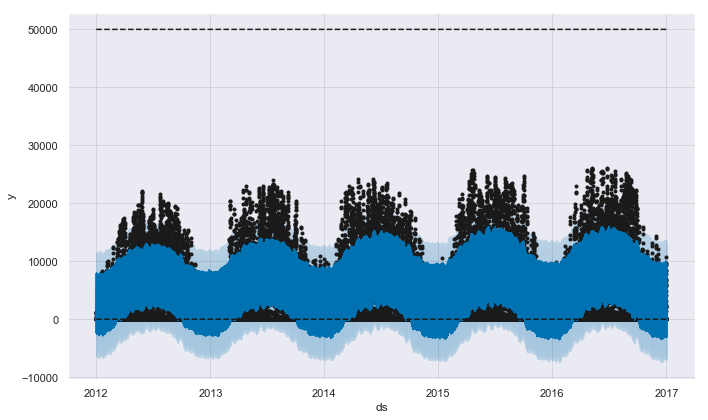

In [1070]:
fig = m.plot(fcst)

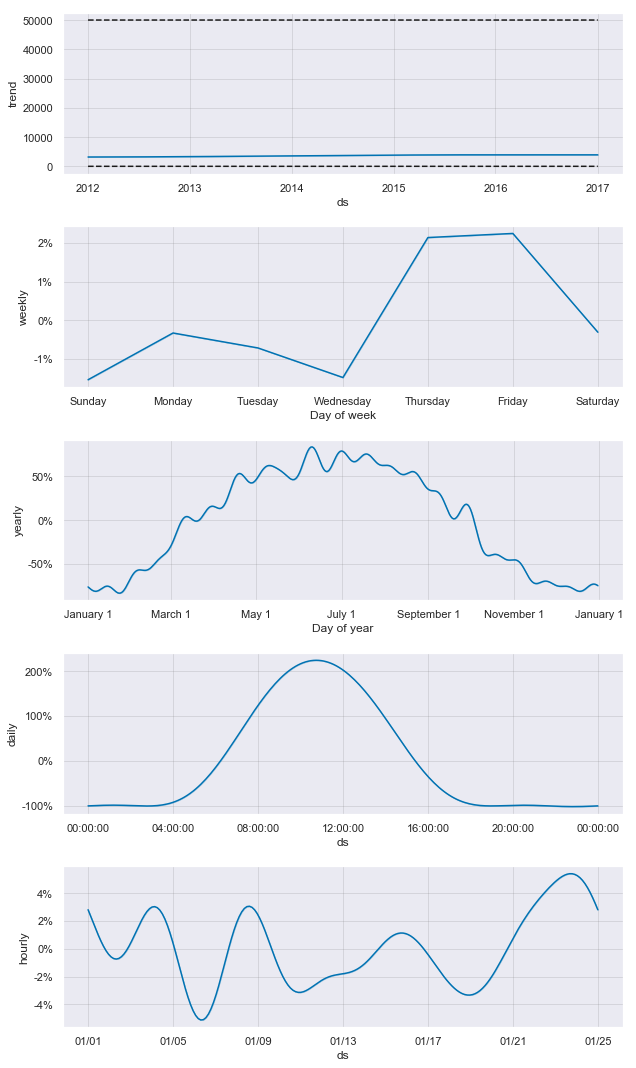

In [1071]:
fig = m.plot_components(fcst)


### Wind

In [1072]:
wind_prophet = []
wind_prophet = combined['DE_wind_generation_actual'].copy()

In [1073]:
wind_prophet = pd.DataFrame(wind_prophet)

In [1074]:
wind_prophet['ds'] = wind_prophet.index

In [1075]:
wind_prophet.columns = ['y', 'ds']
#solar_prophet.ds = pd.to_datetime(solar_prophet.ds, utc=True, errors='coerce')
#solar_prophet['ds'] = solar_prophet['ds'].dt.tz_localize('UTC')
wind_prophet['ds'] = wind_prophet['ds'].dt.tz_convert(None)

In [1076]:
wind_prophet = wind_prophet.reset_index(drop=True)

In [1077]:
wind_prophet['y']=wind_prophet.y.mask(wind_prophet.y == 0, 0.0001)

In [1078]:
#solar_prophet_log = solar_prophet.copy()
#solar_prophet_log['y'] = np.log(solar_prophet['y'])

In [1079]:
#solar_prophet_log.head()

In [1080]:
wind_prophet['floor'] = 0
wind_prophet['cap'] = 50000

In [1081]:
m = Prophet(changepoint_prior_scale=0.0001, growth='logistic', yearly_seasonality=20, seasonality_mode='multiplicative')
m.add_seasonality(name='hourly', period=24, fourier_order=5)
m.fit(wind_prophet)

/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [1082]:
future = m.make_future_dataframe(periods=24, freq='H')
future['floor'] = 0
future['cap'] = 50

In [1083]:
fcst_wind = m.predict(future)

In [1084]:

#fcst_columns = fcst.columns.values
#fcst_ds = fcst['ds']
#fcst_ds = pd.DataFrame(fcst_ds)
#fcst = fcst.drop['ds']
#fcst_columns = fcst_columns.tolist()
#fcst_columns.remove('ds')

In [1085]:
#fcst = np.exp(fcst[fcst_columns])
#fcst = pd.DataFrame(fcst)
#fcst = fcst_ds.join(fcst)

In [1086]:
fcst_wind.head()

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,hourly,hourly_lower,hourly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2011-12-31 23:00:00,2.885862,50,0,-7140.964045,6837.782420,2.885862,2.885862,0.015815,0.015815,0.015815,0.020920,0.020920,0.020920,0.486257,0.486257,0.486257,0.035303,0.035303,0.035303,0.414219,0.414219,0.414219,0.0,0.0,0.0,4.289133
1,2012-01-01 00:00:00,2.885961,50,0,-6860.312360,6181.443260,2.885961,2.885961,0.006871,0.006871,0.006871,0.022158,0.022158,0.022158,0.480230,0.480230,0.480230,0.038027,0.038027,0.038027,0.413173,0.413173,0.413173,0.0,0.0,0.0,4.271885
2,2012-01-01 01:00:00,2.886059,50,0,-6835.065001,6882.150579,2.886059,2.886059,0.001553,0.001553,0.001553,0.023355,0.023355,0.023355,0.477634,0.477634,0.477634,0.040583,0.040583,0.040583,0.412142,0.412142,0.412142,0.0,0.0,0.0,4.264539
3,2012-01-01 02:00:00,2.886157,50,0,-7482.990872,7105.879604,2.886157,2.886157,0.000161,0.000161,0.000161,0.024510,0.024510,0.024510,0.478750,0.478750,0.478750,0.042954,0.042954,0.042954,0.411125,0.411125,0.411125,0.0,0.0,0.0,4.267904
4,2012-01-01 03:00:00,2.886256,50,0,-7207.842333,7234.677844,2.886256,2.886256,-0.001035,-0.001035,-0.001035,0.025619,0.025619,0.025619,0.479831,0.479831,0.479831,0.045126,0.045126,0.045126,0.410122,0.410122,0.410122,0.0,0.0,0.0,4.271171


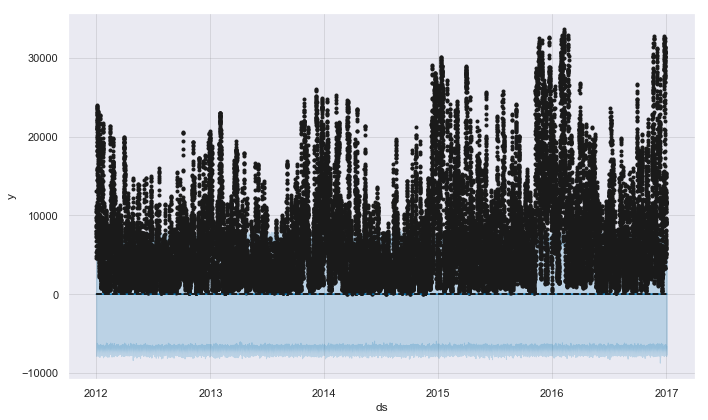

In [1087]:
fig = m.plot(fcst_wind)

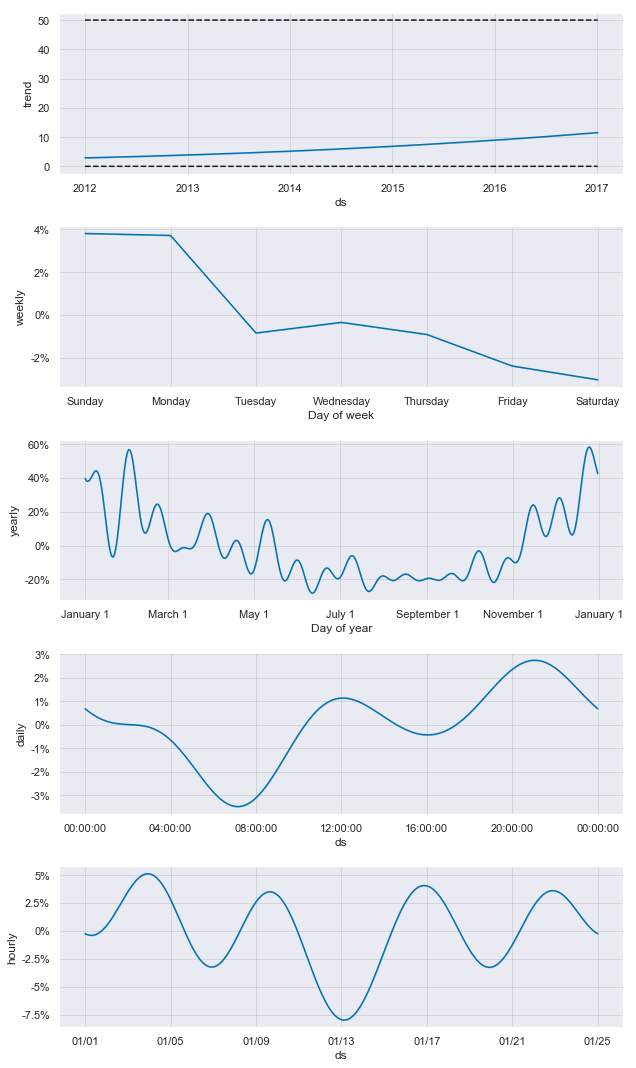

In [1088]:
fig = m.plot_components(fcst_wind)

# Daily

## Wind

In [1089]:
# change confidence interval bandwidth with 
interval_width=0.95

In [1090]:
daily_w =  combined['DE_wind_generation_actual'].resample('D').sum()

/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


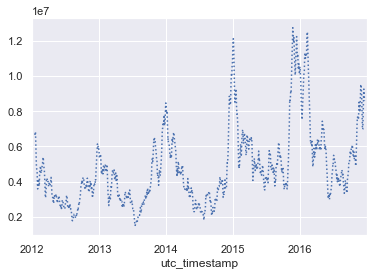

In [1091]:
#daily['DE_wind_generation_actual'].rolling(30, center=True).sum().plot(style=[':', '--', '-'])
daily_w.rolling(30, center=True).sum().plot(style=[':', '--', '-'])

In [1092]:
wind_prophet = []
wind_prophet = daily_w.copy()

In [1093]:
daily.head()

,y,ds
0,4576.0,2011-12-31
1,227465.0,2012-01-01
2,207327.0,2012-01-02
3,473468.0,2012-01-03
4,499804.0,2012-01-04


In [1094]:
wind_prophet = pd.DataFrame(wind_prophet)

In [1095]:
wind_prophet.head()

,DE_wind_generation_actual
utc_timestamp,
2011-12-31 00:00:00+00:00,4576.0
2012-01-01 00:00:00+00:00,227465.0
2012-01-02 00:00:00+00:00,207327.0
2012-01-03 00:00:00+00:00,473468.0
2012-01-04 00:00:00+00:00,499804.0


In [1096]:
wind_prophet['ds'] = wind_prophet.index

In [1097]:
wind_prophet.columns = ['y', 'ds']
wind_prophet['ds'] = wind_prophet['ds'].dt.tz_convert(None)

In [1098]:
wind_prophet = wind_prophet.reset_index(drop=True)

In [1099]:
#wind_prophet['y']=wind_prophet.y.mask(wind_prophet.y == 0, 0.0001)

In [1100]:
wind_prophet['floor'] = 0
wind_prophet['cap'] = 50000

In [1101]:
m_wind = Prophet(changepoint_prior_scale=0.05, interval_width=0.95)
m_wind.fit(wind_prophet)

/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [1102]:
future = m_wind.make_future_dataframe(periods=30*2, freq='D')
future['floor'] = 0
future['cap'] = 50

In [1103]:
fcst_wind = m_wind.predict(future)

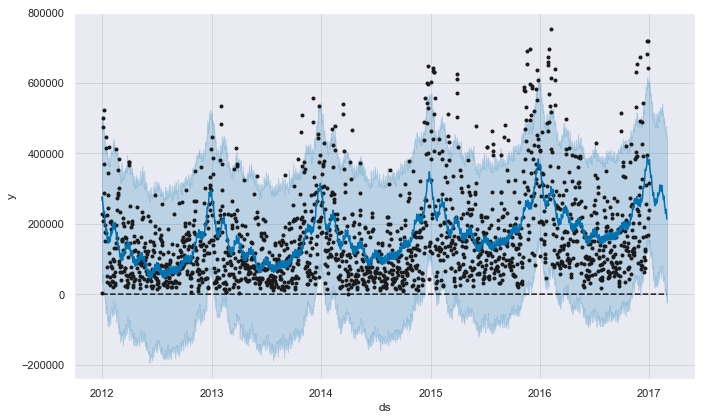

In [1104]:
fig = m_wind.plot(fcst_wind)

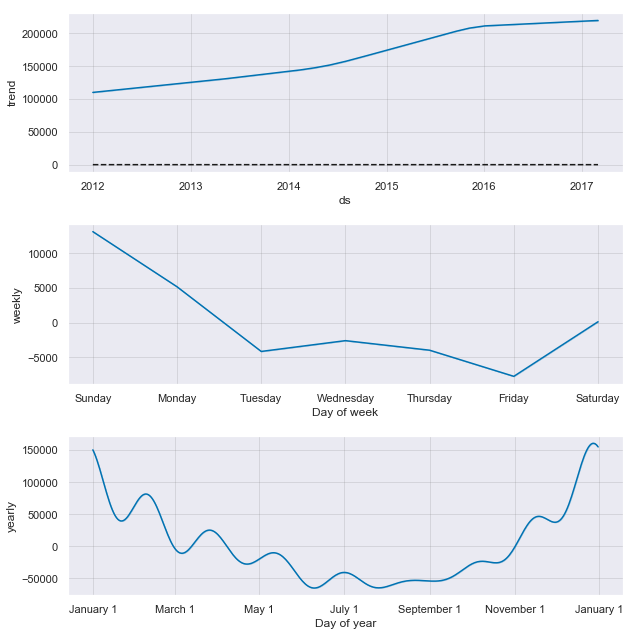

In [1105]:
fig = m_wind.plot_components(fcst_wind)

## Solar

In [1106]:
daily_s =  combined['DE_solar_generation_actual'].resample('D').sum()

/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


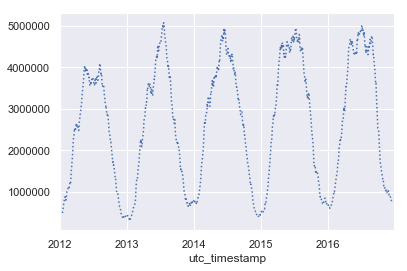

In [1107]:
daily_s.rolling(30, center=True).sum().plot(style=[':', '--', '-'])

In [1108]:
solar_prophet = []
solar_prophet = daily_s.copy()

solar_prophet = pd.DataFrame(solar_prophet)
solar_prophet['ds'] = solar_prophet.index

In [1109]:

solar_prophet.columns = ['y', 'ds']
solar_prophet['ds'] = solar_prophet['ds'].dt.tz_convert(None)
solar_prophet = solar_prophet.reset_index(drop=True)

In [1110]:
solar_prophet['floor'] = 0
solar_prophet['cap'] = 500000

In [1111]:
m_solar = Prophet(changepoint_prior_scale=0.05, interval_width=0.95)
m_solar.fit(solar_prophet)

/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [1112]:
future = m_solar.make_future_dataframe(periods=30*2, freq='D')
future['floor'] = 0
future['cap'] = 50

In [1113]:
fcst_solar = m_solar.predict(future)

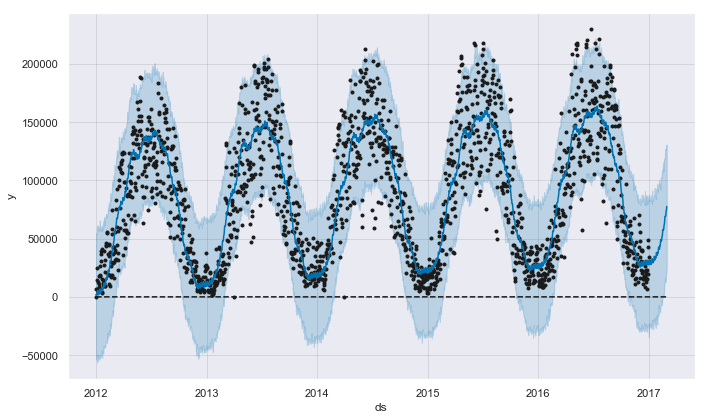

In [1114]:
fig = m_solar.plot(fcst_solar)

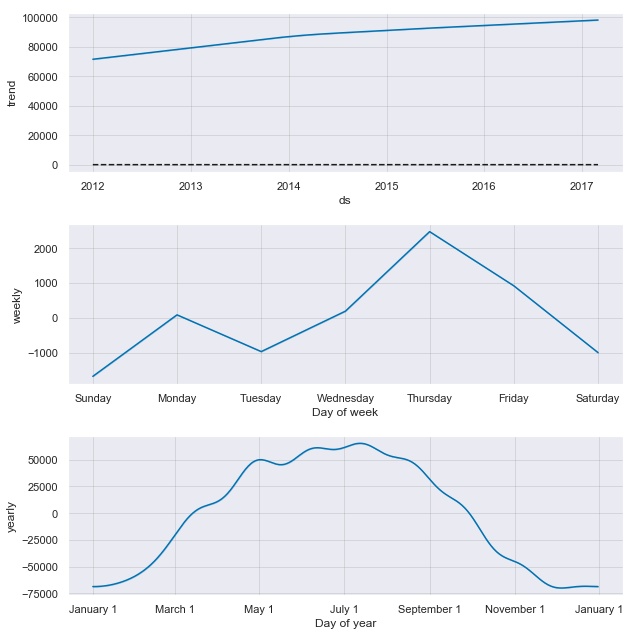

In [1115]:
fig = m_solar.plot_components(fcst_solar)

## Combining Solar and Wind

In [1116]:
solar_names = ['solar_%s' % column for column in fcst_solar.columns]

In [1117]:

wind_names = ['wind_%s' % column for column in fcst_wind.columns]
merge_solar_forecast = fcst_solar.copy()
merge_wind_forecast = fcst_wind.copy()
merge_solar_forecast.columns = solar_names
merge_wind_forecast.columns = wind_names
forecast = pd.merge(merge_solar_forecast, merge_wind_forecast, how = 'inner', left_on = 'solar_ds', right_on = 'wind_ds')
forecast = forecast.rename(columns={'solar_ds': 'Date'}).drop('wind_ds', axis=1)
forecast.head()

,Date,solar_trend,solar_cap,solar_yhat_lower,solar_yhat_upper,solar_trend_lower,solar_trend_upper,solar_additive_terms,solar_additive_terms_lower,solar_additive_terms_upper,solar_weekly,solar_weekly_lower,solar_weekly_upper,solar_yearly,solar_yearly_lower,solar_yearly_upper,solar_multiplicative_terms,solar_multiplicative_terms_lower,solar_multiplicative_terms_upper,solar_yhat,wind_trend,wind_cap,wind_yhat_lower,wind_yhat_upper,wind_trend_lower,wind_trend_upper,wind_additive_terms,wind_additive_terms_lower,wind_additive_terms_upper,wind_weekly,wind_weekly_lower,wind_weekly_upper,wind_yearly,wind_yearly_lower,wind_yearly_upper,wind_multiplicative_terms,wind_multiplicative_terms_lower,wind_multiplicative_terms_upper,wind_yhat
0,2011-12-31,71603.348303,50,-53758.431697,55006.796306,71603.348303,71603.348303,-69638.985393,-69638.985393,-69638.985393,-1001.755953,-1001.755953,-1001.755953,-68637.229440,-68637.229440,-68637.229440,0.0,0.0,0.0,1964.362910,110066.170274,50,31821.958215,489167.360494,110066.170274,110066.170274,156642.072662,156642.072662,156642.072662,136.877071,136.877071,136.877071,156505.195591,156505.195591,156505.195591,0.0,0.0,0.0,266708.242936
1,2012-01-01,71624.560475,50,-53267.419315,53584.433966,71624.560475,71624.560475,-70341.297201,-70341.297201,-70341.297201,-1683.509500,-1683.509500,-1683.509500,-68657.787701,-68657.787701,-68657.787701,0.0,0.0,0.0,1283.263274,110107.763013,50,32617.418904,506640.146246,110107.763013,110107.763013,166397.248779,166397.248779,166397.248779,13127.136814,13127.136814,13127.136814,153270.111964,153270.111964,153270.111964,0.0,0.0,0.0,276505.011792
2,2012-01-02,71645.772647,50,-50708.371303,53895.367230,71645.772647,71645.772647,-68583.595314,-68583.595314,-68583.595314,82.070790,82.070790,82.070790,-68665.666104,-68665.666104,-68665.666104,0.0,0.0,0.0,3062.177333,110149.355753,50,56620.602739,497822.559769,110149.355753,110149.355753,154336.053887,154336.053887,154336.053887,5179.620245,5179.620245,5179.620245,149156.433642,149156.433642,149156.433642,0.0,0.0,0.0,264485.409640
3,2012-01-03,71666.984819,50,-56438.399569,60240.453753,71666.984819,71666.984819,-69631.358904,-69631.358904,-69631.358904,-972.734846,-972.734846,-972.734846,-68658.624058,-68658.624058,-68658.624058,0.0,0.0,0.0,2035.625915,110190.948493,50,21383.395631,478606.979900,110190.948493,110190.948493,140086.728096,140086.728096,140086.728096,-4146.349048,-4146.349048,-4146.349048,144233.077145,144233.077145,144233.077145,0.0,0.0,0.0,250277.676589
4,2012-01-04,71688.196991,50,-49539.148495,61467.928076,71688.196991,71688.196991,-68446.386515,-68446.386515,-68446.386515,188.345769,188.345769,188.345769,-68634.732285,-68634.732285,-68634.732285,0.0,0.0,0.0,3241.810476,110232.541233,50,7870.730017,469425.969394,110232.541233,110232.541233,135992.671859,135992.671859,135992.671859,-2590.807868,-2590.807868,-2590.807868,138583.479727,138583.479727,138583.479727,0.0,0.0,0.0,246225.213092


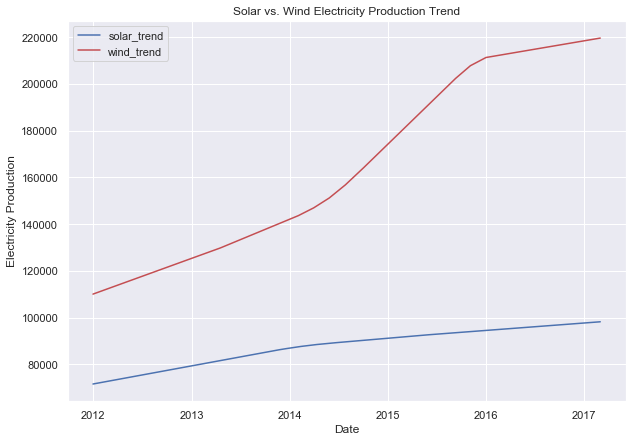

In [1118]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['solar_trend'], 'b-')
plt.plot(forecast['Date'], forecast['wind_trend'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Electricity Production')
plt.title('Solar vs. Wind Electricity Production Trend');

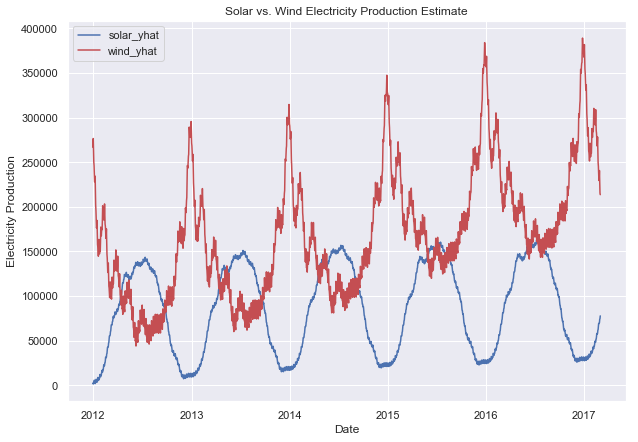

In [1119]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['solar_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['wind_yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Electricity Production')
plt.title('Solar vs. Wind Electricity Production Estimate');

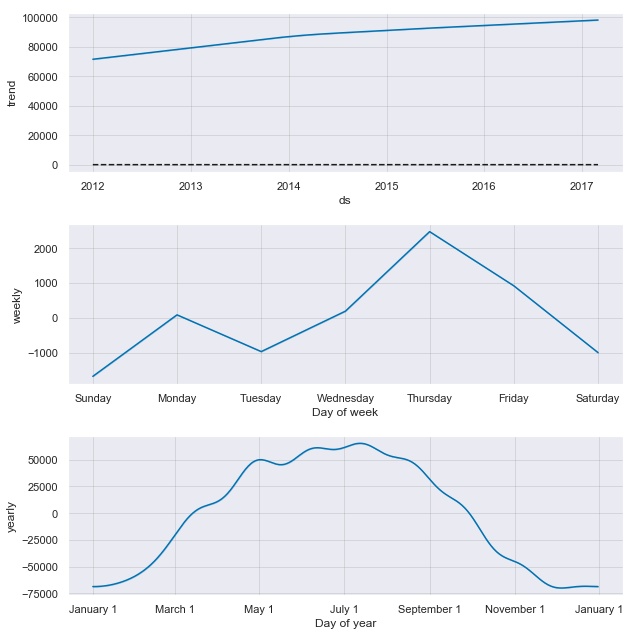

In [1120]:
m_solar.plot_components(fcst_solar);

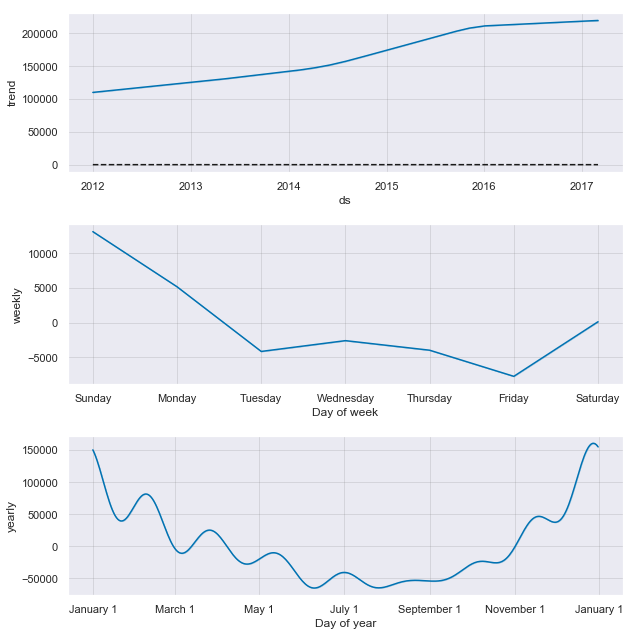

In [1121]:
m_wind.plot_components(fcst_wind);

# Cross validation for time series

Exception: Prophet object can only be fit once. Instantiate a new object.

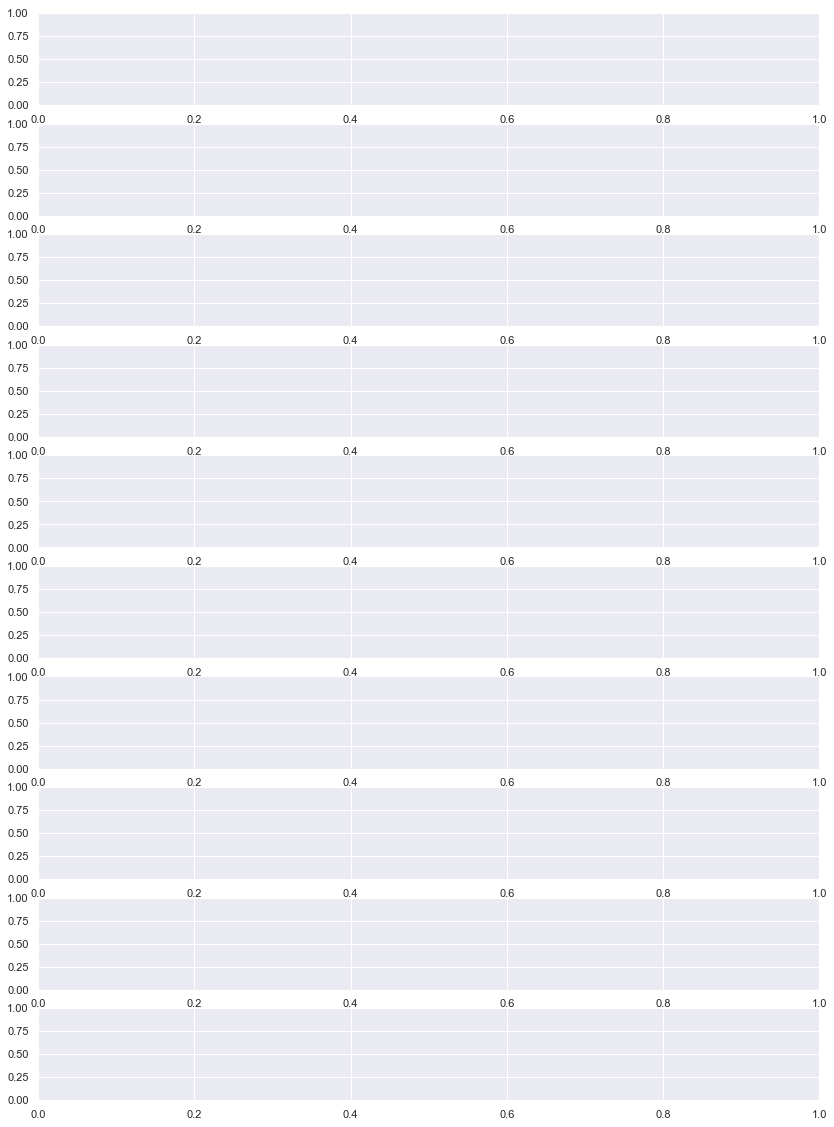

In [1122]:
fig, ax = plt.subplots(10,1, figsize = (14, 20))
ax = ax.ravel()
j = 0
solar_prophet = []
solar_prophet = daily_s.copy()

solar_prophet = pd.DataFrame(solar_prophet)
solar_prophet['ds'] = solar_prophet.index

solar_prophet.columns = ['y', 'ds']
solar_prophet['ds'] = solar_prophet['ds'].dt.tz_convert(None)
solar_prophet = solar_prophet.reset_index(drop=True)

solar_prophet['floor'] = 0
solar_prophet['cap'] = 500000

for i in [0.01, 0.05, 0.10, 0.15, 0.20]:
    #RUT2 = RUT.reset_index()
    #RUT2 = RUT2.rename(columns = {'Date' : 'ds', 'Adj Close' : 'y'} )
    m_solar = Prophet(changepoint_prior_scale=i)
    #fit the prophet model on the data
    m.fit(solar_prophet)
    # make a dataframe of the next two years 
    future = m_solar.make_future_dataframe(periods=365)
    #predict on this future dataframe
    forecast = m_solar.predict(future)
    # plot the forecast 
    fig = m_solar.plot(forecast, ax = ax[j])
    ax[j].set_title('changepoint prior = ' + str(i))
    j += 1
    df_cv = cross_validation(m_solar, initial='365 days', period='180 days', horizon = '365 days')
    df_p = performance_metrics(df_cv)
    fig = plot_cross_validation_metric(df_cv, metric='mape', ax = ax[j])
    ax[j].set_title(str(str(i) + ' Change Point Prior Mean Absolute Percentage Error'))
    ax[j].set_ylim(0,0.5)
    j += 1